In [ ]:
# Βιβλιοθήκες
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
import re
from urllib.parse import urlparse

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

In [ ]:
# Upload CSV αρχείου
uploaded = files.upload()


Saving malicious_phish.csv to malicious_phish.csv


In [ ]:
# Διαβάζουμε το CSV αρχείο μέσω του Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['malicious_phish.csv']))

# Παρουσίαση πρώτων 5 γραμμών
df.head(5)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [ ]:
# τιμές της στήλης type
flist =df['type'].value_counts()
flist

,count
type,
benign,428103
defacement,96457
phishing,94111
malware,32520


In [ ]:
print(df.isnull().sum())

url     0
type    0
dtype: int64


In [ ]:
# Προβολή πόσα διπλότυπα υπάρχουν
dupl = df.duplicated()
print(dupl.value_counts())

False    641125
True      10066
Name: count, dtype: int64


In [ ]:
# Έλεγχος για διπλότυπα URLs και αφαίρεση
df = df.drop_duplicates(subset=['url'])
print(f"Το dataset έχει {df.shape[0]} μοναδικά URLs.")

Το dataset έχει 641119 μοναδικά URLs.


In [ ]:
# τιμές της στήλης type μετά την αφαίρεση των διπλότυπων
nlist = df['type'].value_counts()
nlist

,count
type,
benign,428080
defacement,95308
phishing,94086
malware,23645


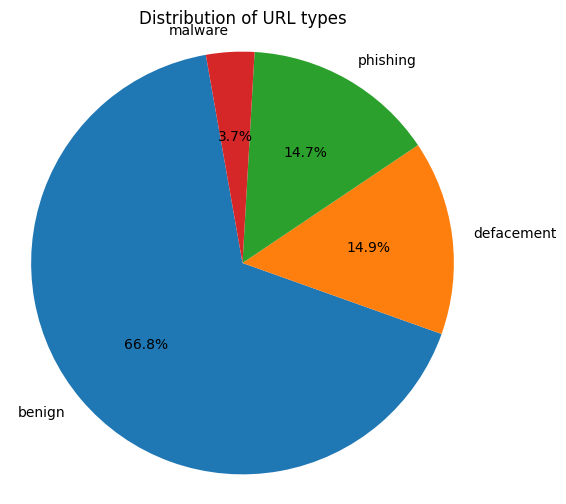

In [ ]:
import matplotlib.pyplot as plt
# Pie chart για τις κατηγορίες
labels = nlist.index
sizes = nlist.values
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100)
plt.title('Distribution of URL types')
plt.axis('equal') # Η ίση αναλογία διαστάσεων διασφαλίζει ότι η πίτα σχεδιάζεται ως κύκλος.
plt.show()

/tmp/ipython-input-1938344856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nlist.index, y=nlist, palette="flare")


Text(0, 0.5, 'Count')

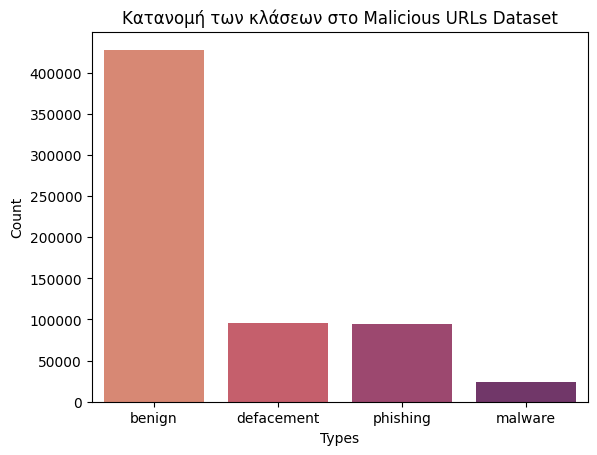

In [ ]:
import seaborn as sns
# Διάγραμμα για κατανομή κλάσεων
sns.barplot(x=nlist.index, y=nlist, palette="flare")
plt.title("Κατανομή των κλάσεων στο Malicious URLs Dataset")
plt.xlabel('Types')
plt.ylabel('Count')

In [ ]:
# αφαίρεση του (www.) από τη διεύθυνση URL
# είναι ένα υποτομέας από μόνη της, αλλά κοινός για όλους
df['url'] = df['url'].str.replace('www.', '', regex=True)
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
# Μετατροπή κατηγοριών σε αριθμούς
categ = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
df['Category']=df['type']
df = df.replace(categ)
df

/tmp/ipython-input-1449411353.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(categ)


,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2
651188,gamespot.com/xbox360/action/deadspace/,phishing,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2


**Εξαγωγή νέων χαρακτηριστικών**

In [ ]:
# Υπολογισμός μήκους URL
df['url_len'] = df['url'].apply(lambda x: len(str(x)))
df

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45


In [ ]:
!pip install tldextract

In [ ]:
import tldextract

# Συνάρτηση που μετράει τα επίπεδα subdomain
def count_subdomains(url):
  extracted = tldextract.extract(url)
  # Παίρνει μόνο το subdomain μέρος
  subdomain = extracted.subdomain
  if subdomain == '':
    return 0
  return len(subdomain.split('.'))

# Εφαρμογή της συνάρτησης
df['num_subdomains'] = df['url'].apply(count_subdomains)

df

,url,type,Category,url_len,num_subdomains
0,br-icloud.com.br,phishing,2,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,1
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,1


In [ ]:
unique_subdomains = df['url'].apply(lambda x: tldextract.extract(x).subdomain).unique()
print(f"Σύνολο διαφορετικών subdomains: {len([s for s in unique_subdomains if s])}")

Σύνολο διαφορετικών subdomains: 41897


In [ ]:
# Προβολή κατανομής υποτομέων
nsub= df['num_subdomains'].value_counts()
nsub

,count
num_subdomains,
0,502228
1,118863
2,9784
3,3076
4,2183
5,1077
9,1021
10,476
7,456


In [ ]:
# Υπολογισμός του πλήθους της τελείας
df['num_dots']=df['url'].apply(lambda i: i.count('.'))
df

,url,type,Category,url_len,num_subdomains,num_dots,digits,special_chars
0,br-icloud.com.br,phishing,2,16,0,2,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,2,1,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,2,1,5
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,2,7,17
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,22,14
...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,1,3,12,6
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,1,2,7,8
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,0,1,3,5
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,1,2,0,9


In [ ]:
# Υπολογισμός αριθμών στη διεύθυνση
def digit_count(url):
  digits = 0
  for i in url:
    if i.isnumeric():
      digits = digits + 1
  return digits
df['digits'] = df['url'].apply(lambda i: digit_count(i))

In [ ]:
# Υπολογισμός ειδικών χαρακτήρων
def count_special_characters(url):
  # Εύρεση οποιουδήποτε χαρακτήρα που δεν είναι αλφαριθμητικός
  special_characters_pattern = re.compile(r'[^a-zA-Z0-9]')
  matches =special_characters_pattern.findall(url)
  return len(matches)

df['special_chars'] = df['url'].apply(lambda i: count_special_characters(i))
df.head()

,url,type,Category,url_len,num_subdomains,num_dots,digits,special_chars
0,br-icloud.com.br,phishing,2,16,0,2,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,2,1,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,2,1,5
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,2,7,17
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,22,14


In [ ]:
# Υπολογισμός πλήθους γραμμάτων
def letter_count(url):
  letters = 0
  for i in url:
    if i.isalpha():
      letters = letters + 1
  return letters
df['letters'] = df['url'].apply(lambda i: letter_count(i))
df

,url,type,Category,url_len,num_subdomains,num_dots,digits,special_chars,letters
0,br-icloud.com.br,phishing,2,16,0,2,0,3,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,2,1,5,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,2,1,5,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,2,7,17,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,22,14,199
...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,1,3,12,6,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,1,2,7,8,29
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,0,1,3,5,30
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,1,2,0,9,36


In [ ]:
# Συνάρτηση για έλεγχο αν ένα URL χρησιμοποιεί HTTPS
def httpSecure(url):
  # Εξαγωγή του scheme (π.χ http, https) από το URL
  htp = urlparse(url).scheme
  match = str(htp)
  # Αν το scheme είναι 'https', επιστρέφει 1 (ασφαλές), αλλιώς 0
  if match=='https':
    return 1
  else:
    return 0
df['Https'] = df['url'].apply(lambda i: httpSecure(i))

nhttp = df['Https'].value_counts()
nhttp

,count
Https,
0,625482
1,15637


In [ ]:
# Υπάρχουν δεδομένα που χρησιμοποιούν HTTPS αλλά δεν ανήκουν στη κατηγορία 0 (benign)

https_and_not_category_0 = df[(df['Https'] == 1) & (df['Category'] != 0)]
https_and_not_category_0

,url,type,Category,url_len,num_subdomains,num_dots,digits,special_chars,letters,Https
40,https://docs.google.com/spreadsheet/viewform?f...,phishing,2,87,1,2,5,9,73,1
3422,https://c...content-available-to-author-only.....,malware,3,62,6,7,0,17,45,1
4551,https://spreadsheets.google.com/spreadsheet/fo...,phishing,2,200,1,2,14,17,169,1
6249,https://spreadsheets.google.com/spreadsheet/em...,phishing,2,99,1,2,4,9,86,1
10631,https://ebc8e2692153bc2259cf4df61f86fd244d3bfc...,phishing,2,99,1,2,27,9,63,1
...,...,...,...,...,...,...,...,...,...,...
555094,https://drive.google.com/uc?export=download&id...,malware,3,80,1,2,2,11,67,1
555118,https://onedrive.live.com/download?cid=9BEF332...,malware,3,108,1,2,22,13,73,1
555119,https://onedrive.live.com/download?cid=DD0A0EC...,malware,3,109,1,2,20,14,75,1
555120,https://onedrive.live.com/download?cid=CF0C6D1...,malware,3,108,1,2,25,13,70,1


<Axes: xlabel='Shortening_Service', ylabel='count'>

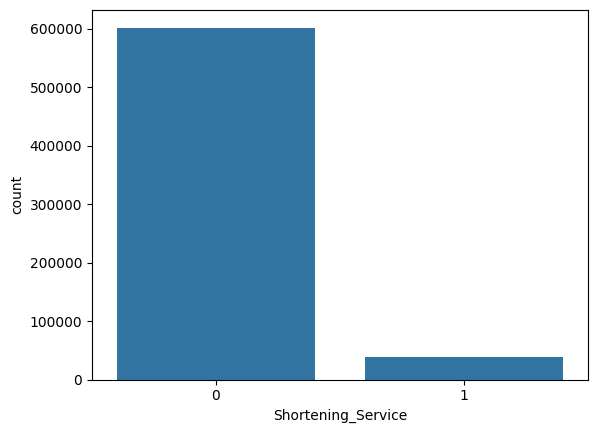

In [ ]:
# Ελέγχει εάν η διεύθυνση URL περιέχει υπηρεσία συντόμευσης
def Shortening_Service(url):
  match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',
                    url, re.IGNORECASE)
  # χρήση r'' για να αποφύγουμε τα διπλά \
  # re.IGNORECASE για παραλλαγές με κεφαλαία γράμματα
  if match:
    return 1
  else:
    return 0

df['Shortening_Service'] = df['url'].apply(lambda x: Shortening_Service(x))
# Διάγραμμα για κατανομή
sns.countplot(x='Shortening_Service', data=df)

In [ ]:
df['Shortening_Service'].value_counts()

,count
Shortening_Service,
0,601701
1,39418


In [ ]:
# Εύρεση εάν χρησιμοποιείται ΙΡ στη διεύθυνση
def having_ip(url):
  try:
    hostname = urlparse(url).hostname
    if hostname is None:
      return 0

    # Regex για IPv4
    ipv4_pattern = re.compile(r'^(\d{1,3}\.){3}\d{1,3}$')

    # Regex για IPv6
    ipv6_pattern = re.compile(r'^([0-9a-fA-F:]+:+)+[0-9a-fA-F]+$')

    if ipv4_pattern.match(hostname):
      return 1
    elif ipv6_pattern.match(hostname):
      return 1
    else:
      return 0
  except:
    return 0

df['having_ip'] = df['url'].apply(having_ip)
df

,url,type,Category,url_len,num_subdomains,num_dots,digits,special_chars,letters,Https,Shortening_Service,having_ip
0,br-icloud.com.br,phishing,2,16,0,2,0,3,13,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,2,1,5,29,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,2,1,5,25,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,2,7,17,60,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,2,22,14,199,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,1,3,12,6,21,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,1,2,7,8,29,0,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,0,1,3,5,30,0,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,1,2,0,9,36,0,0,0


In [ ]:
df['having_ip'].value_counts()

,count
having_ip,
0,629031
1,12088


In [ ]:
# Αποθήκευση σε αρχείο CSV
df.to_csv('my_new_data.csv', index=False, encoding='utf-8')

**Κανονικοποίηση Αριθμητικών Χαρακτηριστικών και επανένωση με δυαδικά**

In [ ]:
# Ορισμός 2 κατηγοριών χαρακτηριστικών
numeric_features = ['url_len', 'num_subdomains', 'num_dots', 'digits', 'special_chars', 'letters']
binary_features = ['Https', 'Shortening_Service', 'having_ip']
features = numeric_features + binary_features


In [ ]:
# Διαχωρισμός Train/Test
X = df[features]
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Αντιγραφή αριθμητικών από τα υποσύνολα
X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]

# Εφαρμογή του scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [ ]:
# binary χωρίς επεξεργασία
X_train_bin = X_train[binary_features]
X_test_bin = X_test[binary_features]

In [ ]:
# Ένωση αριθμητικά και δυαδικά χαρακτηριστικά
# Όταν συνδυάζεις δύο πίνακες με .hstack() (δηλαδή X_train_scaled και X_train_bin),
# η σειρά των δειγμάτων (γραμμών) πρέπει να είναι ίδια
# Τα δεδομένα είναι από το ίδιο DataFrame(X_train) με slicing
# Η σειρά των γραμμών παραμένει ίδια
X_train_final = np.hstack((X_train_scaled, X_train_bin))
X_test_final = np.hstack((X_test_scaled, X_test_bin))

Έλεγχος Αντιστοιχίας

In [ ]:
# Δημιουργία DataFrame από τα κανονικοποιημένα αριθμητικά στοιχεία
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=numeric_features)
X_train_scaled_df.head()

,url_len,num_subdomains,num_dots,digits,special_chars,letters
266836,-0.916592,-0.322709,-0.717296,-0.459884,-0.761004,-0.937486
65776,1.988433,0.710158,1.423144,0.482108,1.757380,2.195792
59272,-0.112124,-0.322709,-0.717296,-0.459884,-0.131408,0.043641
267008,0.491228,-0.322709,-0.003816,1.081558,-0.005489,0.296835
582136,-0.648436,-0.322709,-0.003816,-0.374248,-0.635085,-0.620994


In [ ]:
# Δυαδικά στοιχεία DataFrame
X_train_bin_df = X_train[binary_features]
X_train_bin_df.head()

,Https,Shortening_Service,having_ip
266836,0,0,0
65776,0,0,0
59272,0,0,0
267008,0,0,0
582136,0,0,0


In [ ]:
# Έλεγχος πρώτης γραμμής
row_original = X_train.iloc[0]
row_scaled = X_train_scaled_df.iloc[0]
row_binary = X_train_bin_df.iloc[0]

print("Από αρχικό X_train")
print(row_original)

print("\nScaled Αριθμητικά:")
print(row_scaled)

print("\nΔυαδικά:")
print(row_binary)

# τελική συνδυασμένη μορφή για αντιστοίχιση
print("\n Συνδυασμένο:")
print(X_train_final[0])


Από αρχικό X_train
url_len               18
num_subdomains         0
num_dots               1
digits                 0
special_chars          3
letters               15
Https                  0
Shortening_Service     0
having_ip              0
Name: 266836, dtype: int64

Scaled Αριθμητικά:
url_len          -0.916592
num_subdomains   -0.322709
num_dots         -0.717296
digits           -0.459884
special_chars    -0.761004
letters          -0.937486
Name: 266836, dtype: float64

Δυαδικά:
Https                 0
Shortening_Service    0
having_ip             0
Name: 266836, dtype: int64

 Συνδυασμένο:
[-0.91659226 -0.32270906 -0.7172956  -0.45988395 -0.76100415 -0.93748648
  0.          0.          0.        ]


Κατασκευή ML μοντέλων και Εκπαίδευση


  Model: Random Forest


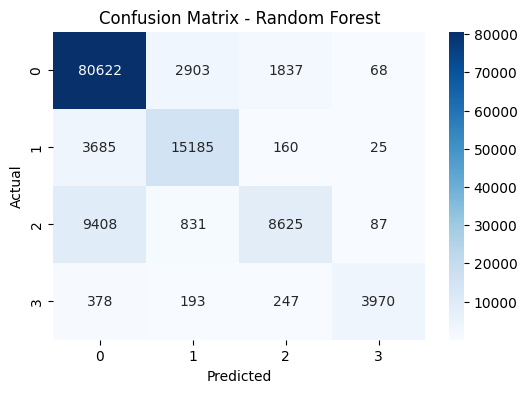


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     85430
           1       0.79      0.80      0.80     19055
           2       0.79      0.46      0.58     18951
           3       0.96      0.83      0.89      4788

    accuracy                           0.85    128224
   macro avg       0.85      0.76      0.79    128224
weighted avg       0.84      0.85      0.84    128224


  Model: Support Vector Machine


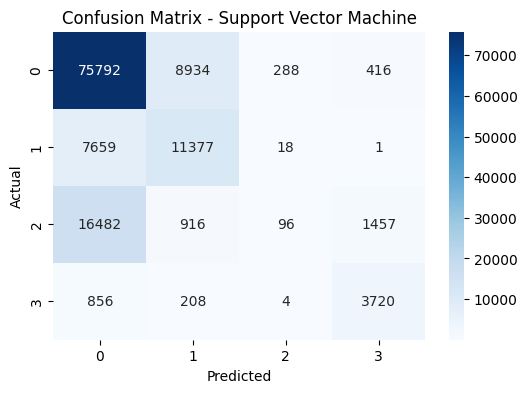


Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.75      0.89      0.81     85430
           1       0.53      0.60      0.56     19055
           2       0.24      0.01      0.01     18951
           3       0.66      0.78      0.72      4788

    accuracy                           0.71    128224
   macro avg       0.55      0.57      0.53    128224
weighted avg       0.64      0.71      0.65    128224


  Model: Naive Bayes-Gaussian


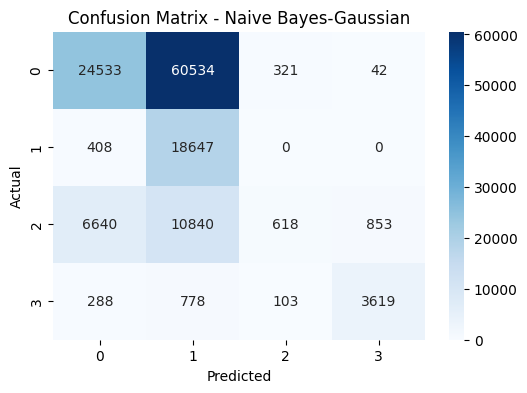


Classification Report for Naive Bayes-Gaussian:

              precision    recall  f1-score   support

           0       0.77      0.29      0.42     85430
           1       0.21      0.98      0.34     19055
           2       0.59      0.03      0.06     18951
           3       0.80      0.76      0.78      4788

    accuracy                           0.37    128224
   macro avg       0.59      0.51      0.40    128224
weighted avg       0.66      0.37      0.37    128224


  Model: Naive Bayes-Bernoulli


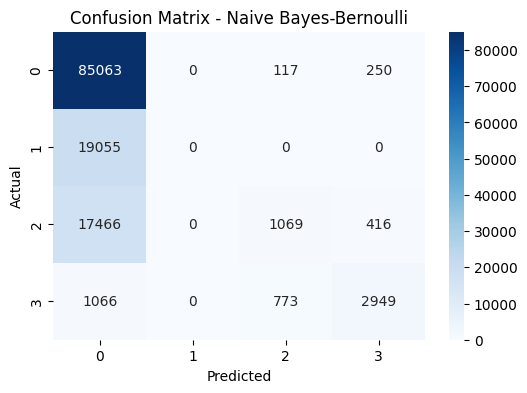


Classification Report for Naive Bayes-Bernoulli:

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     85430
           1       0.00      0.00      0.00     19055
           2       0.55      0.06      0.10     18951
           3       0.82      0.62      0.70      4788

    accuracy                           0.69    128224
   macro avg       0.51      0.42      0.41    128224
weighted avg       0.57      0.69      0.59    128224


  Model: XGBoost


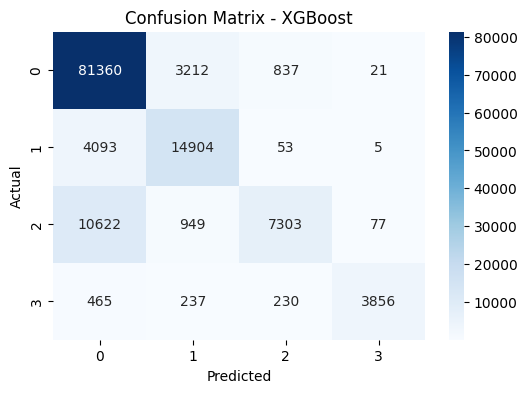


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     85430
           1       0.77      0.78      0.78     19055
           2       0.87      0.39      0.53     18951
           3       0.97      0.81      0.88      4788

    accuracy                           0.84    128224
   macro avg       0.86      0.73      0.77    128224
weighted avg       0.84      0.84      0.82    128224


  Model: Gradient Boosting


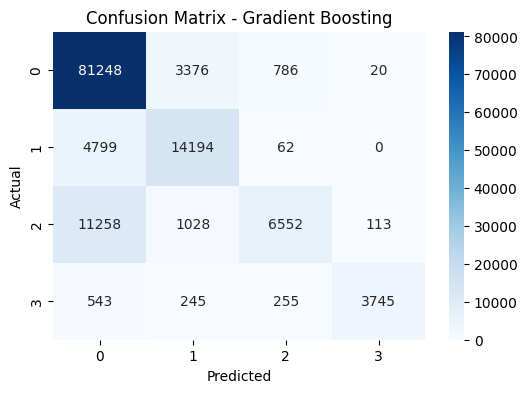


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     85430
           1       0.75      0.74      0.75     19055
           2       0.86      0.35      0.49     18951
           3       0.97      0.78      0.86      4788

    accuracy                           0.82    128224
   macro avg       0.85      0.71      0.75    128224
weighted avg       0.83      0.82      0.81    128224


  Model: AdaBoost


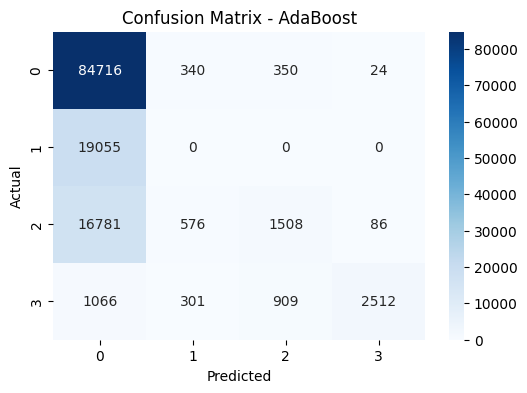


Classification Report for AdaBoost:

              precision    recall  f1-score   support

           0       0.70      0.99      0.82     85430
           1       0.00      0.00      0.00     19055
           2       0.54      0.08      0.14     18951
           3       0.96      0.52      0.68      4788

    accuracy                           0.69    128224
   macro avg       0.55      0.40      0.41    128224
weighted avg       0.58      0.69      0.59    128224


  Model: K-Nearest Neighbors


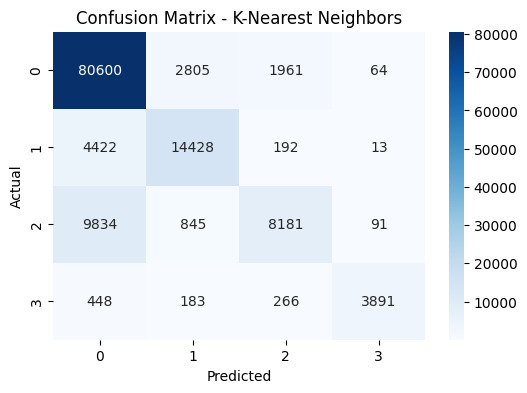


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     85430
           1       0.79      0.76      0.77     19055
           2       0.77      0.43      0.55     18951
           3       0.96      0.81      0.88      4788

    accuracy                           0.84    128224
   macro avg       0.84      0.74      0.77    128224
weighted avg       0.83      0.84      0.82    128224


  Model: Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


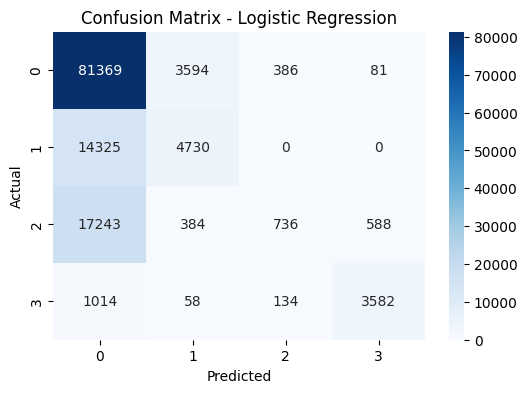


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.71      0.95      0.82     85430
           1       0.54      0.25      0.34     19055
           2       0.59      0.04      0.07     18951
           3       0.84      0.75      0.79      4788

    accuracy                           0.71    128224
   macro avg       0.67      0.50      0.51    128224
weighted avg       0.67      0.71      0.63    128224


 Συγκεντρωτικός Πίνακας Αποτελεσμάτων:
                    Model  Accuracy  Precision  Recall  F1-Score  \
0           Random Forest    0.8454     0.8419  0.8454    0.8353   
1  Support Vector Machine    0.7096     0.6397  0.7096    0.6541   
2    Naive Bayes-Gaussian    0.3698     0.6610  0.3698    0.3673   
3   Naive Bayes-Bernoulli    0.6947     0.5732  0.6947    0.5861   
4                 XGBoost    0.8378     0.8408  0.8378    0.8230   
5       Gradient Boosting    0.8246     0.8277  0.8246    0.8071   


In [158]:
import time
# Ονόματα μοντέλων που χρειάζονται κανονικοποίηση
scaled_models = ["Support Vector Machine",
                 "Naive Bayes-Gaussian",
                 "K-Nearest Neighbors",
                 "Logistic Regression"]

# Μοντέλα
models ={
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": LinearSVC(max_iter=1000, random_state=42, class_weight='balanced'),
    "Naive Bayes-Gaussian": GaussianNB(),
    "Naive Bayes-Bernoulli": BernoulliNB(),
    "XGBoost": XGBClassifier(n_estimators=100, eval_metric='mlogloss'), #ταξινόμηση πολλών κατηγοριών - eval_metric='mlogloss'
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.25),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.85),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=6),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial')
}

# Πίνακας αποτελεσμάτων
results = []

# Εκπαίδευση και Αξιολόγηση
for name, model in models.items():
  print(f"\n  Model: {name}")

  if name in scaled_models:
    # scaled αριθμητικά και δυαδικά
    X_train_all = X_train_final
    X_test_all = X_test_final
  else:
    # αρχικά δεδομένα - απλά
    X_train_all = X_train
    X_test_all = X_test

  start_time = time.time()
  model.fit(X_train_all, y_train)
  y_pred = model.predict(X_test_all)

  train_time = time.time() - start_time
  # Μετρικές
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  # Χρησιμοποιείται "weighted average" - δηλαδή κάθε τάξη
  # συμβάλλει στην τελική τιμή ανάλογα με το πλήθος των δειγμάτων της (support στο πίνακα).

  # Προσθήκη στη λίστα αποτελεσμάτων
  results.append({
      "Model": name,
      "Accuracy": round(accuracy, 4),
      "Precision": round(precision, 4),
      "Recall": round(recall, 4),
      "F1-Score": round(f1, 4),
      "Training Time (sec)": round(train_time, 2)
  })

  # Confusion Matrix Plot
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix - {name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Εκτύπωση λεπτομερούς αναφοράς
  print(f"\nClassification Report for {name}:\n")
  print(classification_report(y_test, y_pred, zero_division=0))

# Μετατροπή λίστας σε DataFrame
results_table = pd.DataFrame(results)

# Τελικός Πίνακας Αποτελεσμάτων
print("\n Συγκεντρωτικός Πίνακας Αποτελεσμάτων:")
print(results_table)

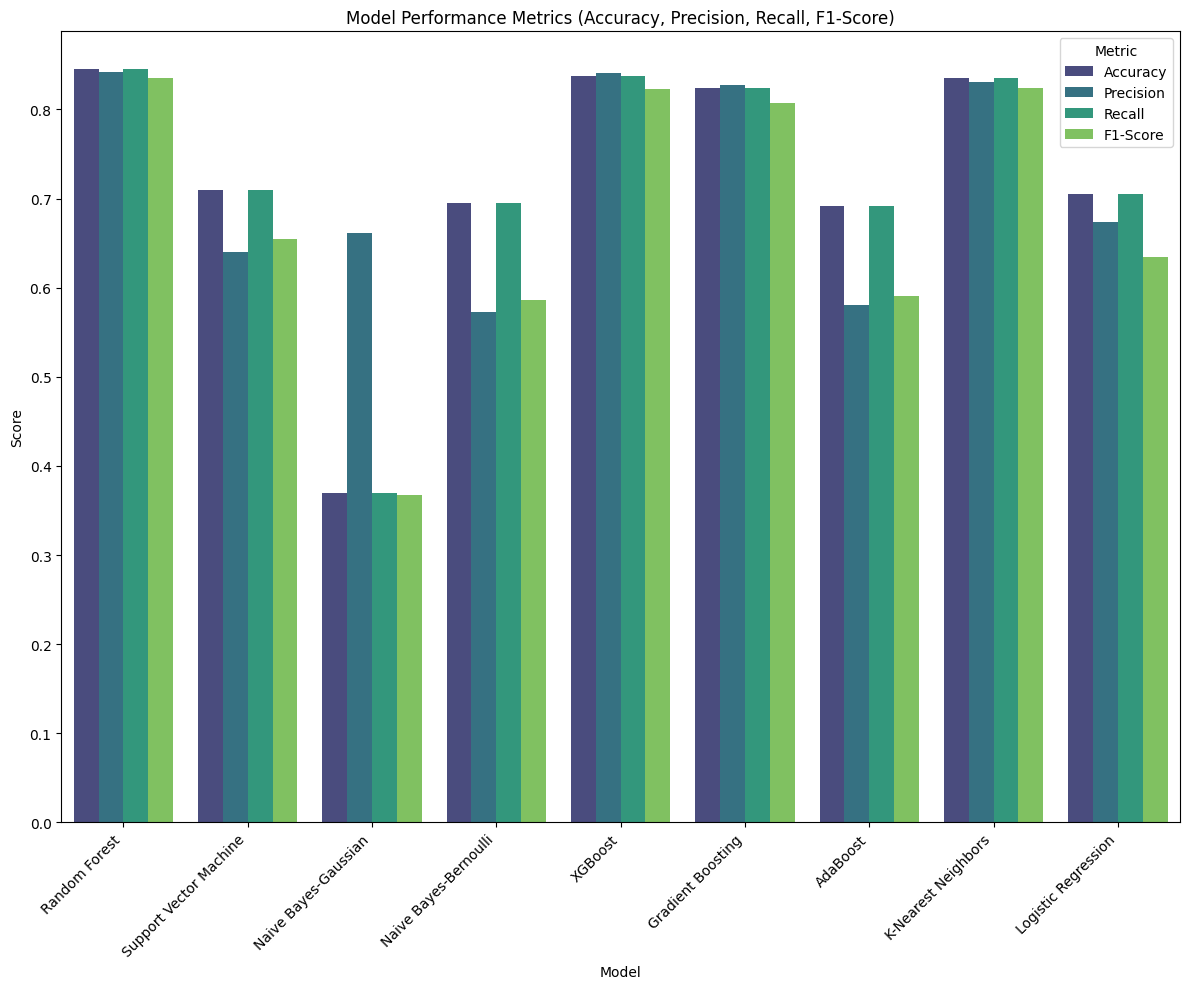

/tmp/ipython-input-3595981849.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (sec)', data=results_table, palette='plasma')


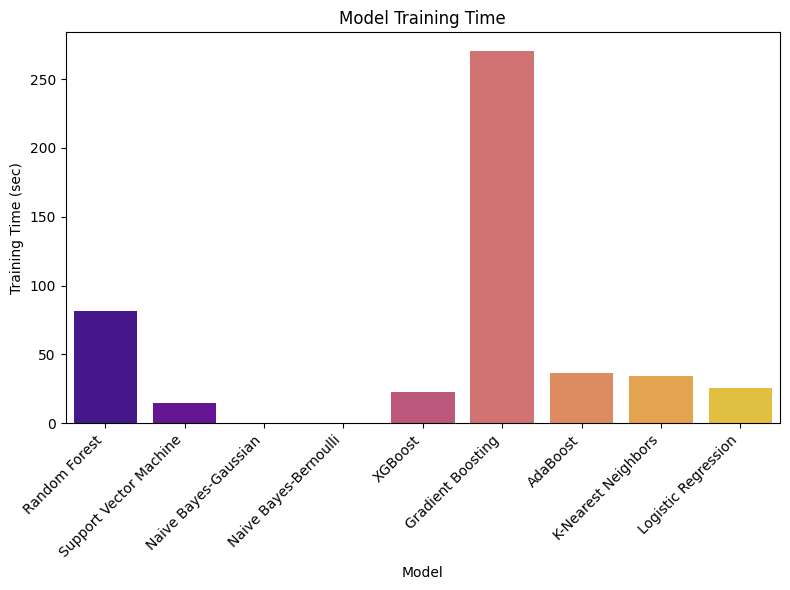

In [160]:
# Διάγραμμα συνολικών αποτελεσμάτων για κάθε μοντέλο (μετρικές και χρόνοι)

# Μετατροπή DataFrame για εύκολη σχεδίαση
results_melt = results_table.melt(
    id_vars= 'Model',
    value_vars = ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    var_name= 'Metric',
    value_name= 'Score'
)

# Διάγραμμα μετρικών
plt.figure(figsize=(12,10))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melt, palette='viridis')
plt.title('Model Performance Metrics (Accuracy, Precision, Recall, F1-Score)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Διάγραμμα χρόνου εκπαίδευσης
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='Training Time (sec)', data=results_table, palette='plasma')
plt.title('Model Training Time')
plt.xlabel('Model')
plt.ylabel('Training Time (sec)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()